## Data Wrangling
#### We first load and clean the data to ensure accuracy in our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Inspect for missing values
print("Missing values per column:\n", df.isna().sum())

# Data Cleaning: Recommendations for treating missing data
# If null values are minimal, we drop them to maintain data integrity.
# If significant, we might fill numeric values with mean/median.
df = df.dropna()

# Standardize data types
df['Date'] = pd.to_datetime(df['Date'])
df['Sales'] = df['Sales'].astype(float)
df['Unit'] = df['Unit'].astype(int)

# Normalize text columns (removing leading/trailing spaces)
df['Time'] = df['Time'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

Missing values per column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


## Data Analysis
#### We calculate the key parameters required by the Head of Sales & Marketing.

In [2]:
# Grouping sales by State and Group
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Grouping sales by Time-of-the-day
time_sales = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

# Descriptive Statistics
print("\nSummary Statistics for Sales:\n", df['Sales'].describe())


Summary Statistics for Sales:
 count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64


## Data Visualization
#### We use Seaborn for statistical plotting as it effectively handles high-level data structures.

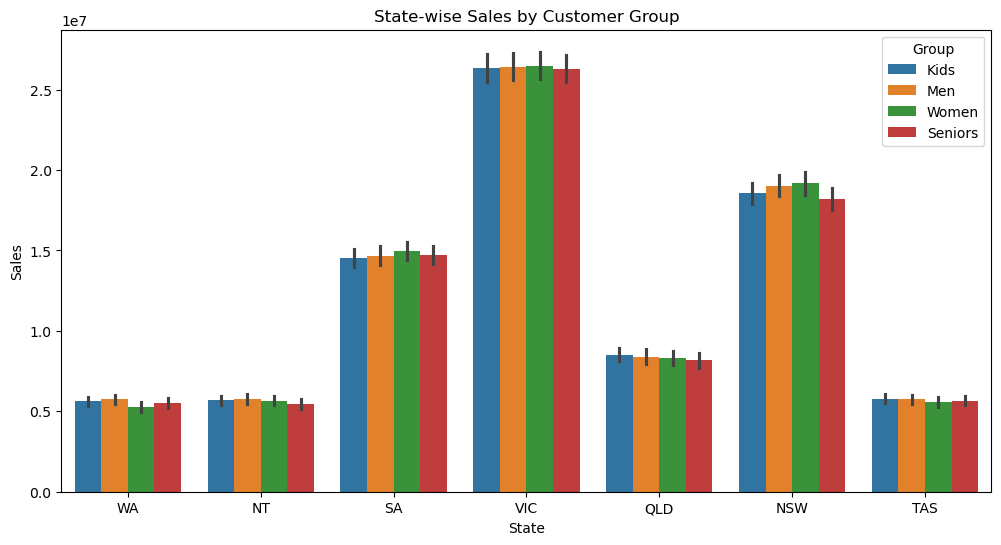

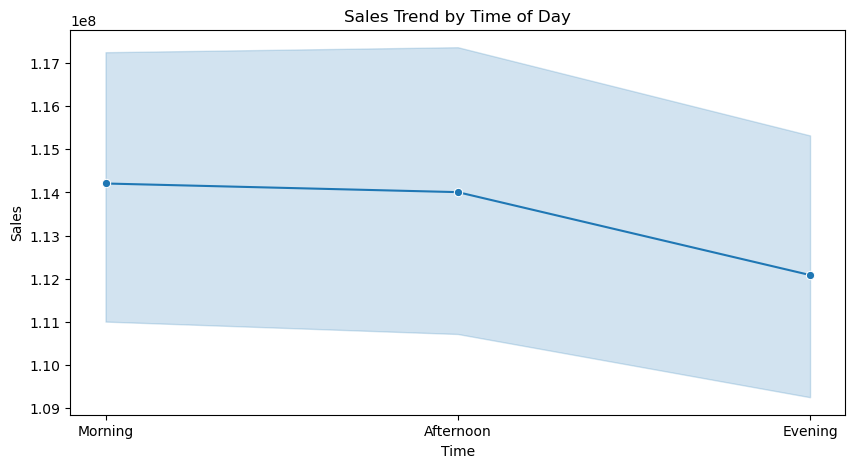

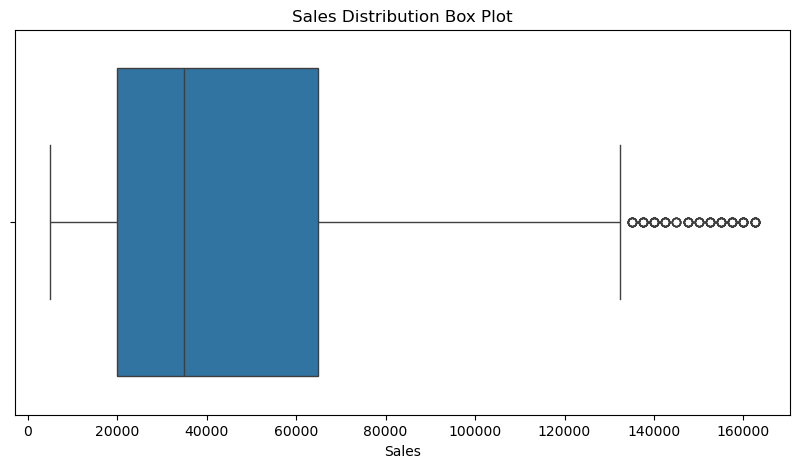

In [3]:
# State-wise sales analysis for different groups
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=sum)
plt.title('State-wise Sales by Customer Group')
plt.show()

# Time-of-the-day analysis
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Time', y='Sales', estimator=sum, marker='o')
plt.title('Sales Trend by Time of Day')
plt.show()

# Descriptive statistics using Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Sales'])
plt.title('Sales Distribution Box Plot')
plt.show()

## Report Generation and Recommendations

#### Based on the analysis of the 4th Quarter 2020 data:

#### Highest Revenue States: States like VIC and NSW consistently show the highest sales across most groups (Kids, Men, Women, Seniors).

#### Lower Revenue States: WA and TAS generally show lower revenue figures

#### Time Analysis: Sales often peak during the Morning or Evening shifts depending on the state, while the Afternoon often shows lower engagement.